In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as plt

In [4]:
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""

    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [5]:
credentials_1 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_f962b5f8_4788_49ff_aa47_5e4673e53a2b',
  'project_id':'1b4094970a544940859cdd585d0f462c',
  'region':'dallas',
  'user_id':'cf7b734f80d54703bddedc60fe77bc33',
  'domain_id':'4212beab9a7f469391135e26f7219597',
  'domain_name':'1141491',
  'username':'admin_c68b1bc189f64a5099a7c50bfd7621dc0de4dbd2',
  'password':"""WX.Lkgg8z_Ud#P6l""",
  'filename':'License_Applications.csv',
  'container':'notebooks',
  'tenantId':'saa0-89a6bc0b359e28-b159885f0f89'
}

In [6]:
import requests, StringIO, pandas as pd, json, re

In [7]:
content_string = get_file_content(credentials_1)

In [8]:
dataFrame = pd.read_csv(content_string)

In [12]:
dataFrame.head(5)

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,Unit Type,Unit,Description,City,State,Zip,Contact Phone,Longitude,Latitude,Active Vehicles
0,10447-2016-RGEV,2004323-DCA,Individual,Renewal,HONG BO LIANG,Issued,08-08-16,08-08-16,NaN,NaN,...,NaN,NaN,NaN,STATEN ISLAND,NY,10304,6462807901,NaN,NaN,NaN
1,10033-2015-RDPD,1438257-DCA,Business,Renewal,ALL SOUTH-SHORE MEDICAL SUPPLY INC.,Issued,03-02-15,03-03-15,NaN,NaN,...,NaN,NaN,NaN,OCEANSIDE,NY,11572,5165435690,NaN,NaN,NaN
2,10317-2016-APDD,2041136-DCA,Individual,Application,Paulo Krummenauer,Issued,07/25/2016,07/27/2016,NaN,NaN,...,NaN,1R,NaN,ASTORIA,NY,11103,6463724101,NaN,NaN,NaN
3,15209-2015-RPDD,1416422-DCA,Individual,Renewal,BEKHZOD BERDYEV,Issued,04-08-15,04-09-15,NaN,NaN,...,NaN,B4,NaN,BROOKLYN,NY,11229,9172514112,NaN,NaN,NaN
4,10041-2016-REHD,0898899-DCA,Business,Renewal,RELIABLE REFRIGERATION INC.,Issued,07/19/2016,07/20/2016,NaN,NaN,...,NaN,NaN,NaN,BAYSIDE,NY,11361,7182258700,-73.786606,40.766428,NaN


In [75]:
dataFrame.tail(5)

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,Unit Type,Unit,Description,City,State,Zip,Contact Phone,Longitude,Latitude,Active Vehicles
3534,14970-2015-RHIC,1234557-DCA,Business,Renewal,"BHALLI, MOHAMMED",Issued,04-07-15,04-08-15,NaN,NaN,...,APT,2,NaN,BROOKLYN,NY,11204,9178074069,-73.989104,40.615690,NaN
3535,10410-2015-RHIC,1474094-DCA,Business,Renewal,MIHHEIKIN REMODELING LLC,Issued,04-07-15,04-08-15,NaN,NaN,...,APT,1R,NaN,BROOKLYN,NY,11215,9173316735,-73.992145,40.664245,NaN
3536,14794-2015-ACRD,2030472-2-DCA,Business,Application,SAMMY DELI CORP.,Issued,11/16/2015,11/17/2015,NaN,NaN,...,NaN,NaN,NaN,NEW YORK,NY,10040,646-918-6111,-73.926684,40.860900,NaN
3537,10482-2016-RGEV,1181237-DCA,Individual,Renewal,WILLIAM H SMALLWOOD,Issued,08-09-16,08-09-16,NaN,NaN,...,NaN,FL 1,NaN,NEW YORK,NY,10031,2126904598,NaN,NaN,NaN
3538,10194-2015-RHIC,1469724-DCA,Business,Renewal,SM CONTRACTING NY INC.,Denied,07/29/2015,07/29/2015,12-05-15,11/30/2015,...,NaN,NaN,NaN,BROOKLYN,NY,11238,2129603254,-73.960748,40.679516,NaN


In [14]:
dataFrame.describe()

,Longitude,Latitude
count,1436.000000,1436.000000
mean,-73.929352,40.724674
std,0.085970,0.082434
min,-74.253761,40.502660
25%,-73.984116,40.670039
50%,-73.932102,40.728010
75%,-73.876380,40.774988
max,-73.707479,40.907194


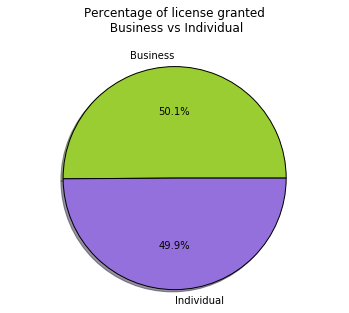

In [124]:
%matplotlib inline

d = dataFrame['License Type'].value_counts()
labels = d.keys()
i = 0
sizes = []
while i < len(d):
    sizes.append(d.get(labels[i]))
    i += 1
colors = ['yellowgreen', 'mediumpurple']
plt.pyplot.pie(sizes,              # data
        labels=labels,      # slice labels
        colors=colors,      # array of colours
        autopct='%1.1f%%',  # print the values inside the wedges
        shadow=True,        # enable shadow
        startangle=0       # starting angle
        ) 
plt.pyplot.axis('equal')
plt.pyplot.title('Percentage of license granted\n Business vs Individual\n\n')
plt.pyplot.show()

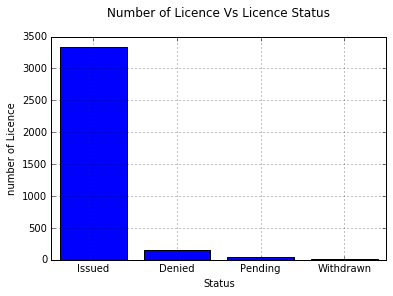

In [65]:
d = dataFrame['Status'].value_counts()
valList = []
for val in d.keys():
    valList.append(d[val])
plt.pyplot.bar(range(len(d)), valList, align='center')
plt.pyplot.xticks(range(len(d)), d.keys())
plt.pyplot.grid(True)
plt.pyplot.xlabel('Status')
plt.pyplot.ylabel('number of Licence')
plt.pyplot.title('Number of Licence Vs Licence Status\n')
plt.pyplot.show()

In [101]:
dataFrame['State'].value_counts()

NY             3310
NJ              115
PA               22
CT               10
TX                9
VA                6
CA                5
DE                5
OH                5
FL                4
NC                4
MA                2
CO                2
MD                2
NH                2
IL                2
MI                2
MO                2
PHILIPPINES       1
OK                1
Cheshire          1
GA                1
AZ                1
UT                1
IN                1
NE                1
SURREY            1
KS                1
SC                1
KY                1
LONDON            1
WA                1
Name: State, dtype: int64

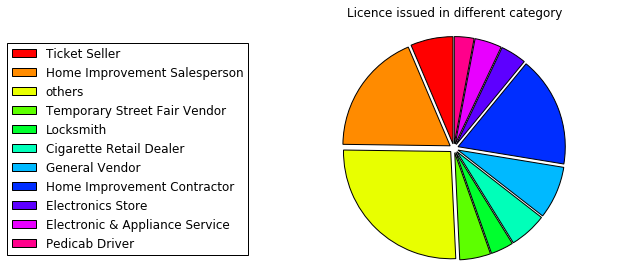

In [123]:
%matplotlib inline
import colorsys

df = dataFrame['License Category'].value_counts()
others=0
list ={}
for val in df.keys():
    if df[val] < 100:
        others = others + df[val]
    else:
        list[val] = df[val] 
list['others'] = others

labels = list.keys()
i = 0
values = []
while i < len(list):
    values.append(list.get(labels[i]))
    i= i+1

explode = []
for k in labels:
    explode.append(0.05)

HSV_tuples = [(x*1.0/i, 1, 1) for x in range(i)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

patches, texts = plt.pyplot.pie(values,colors= RGB_tuples, explode=explode, startangle=90, radius=1.2)
plt.pyplot.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.pyplot.axis('equal')
plt.pyplot.title('Licence issued in different category\n')
plt.pyplot.show()

In [146]:
#Application Status Distribution by Group

df1 = dataFrame[['Application or Renewal','Status','State']]
counts = df1.groupby(['Application or Renewal','Status']).size();
counts

Application or Renewal  Status   
Application             Denied        120
                        Issued       1605
                        Pending        20
                        Withdrawn       9
Renewal                 Denied         39
                        Issued       1726
                        Pending        20
dtype: int64

In [150]:
!pip install --user seaborn
import seaborn as sns

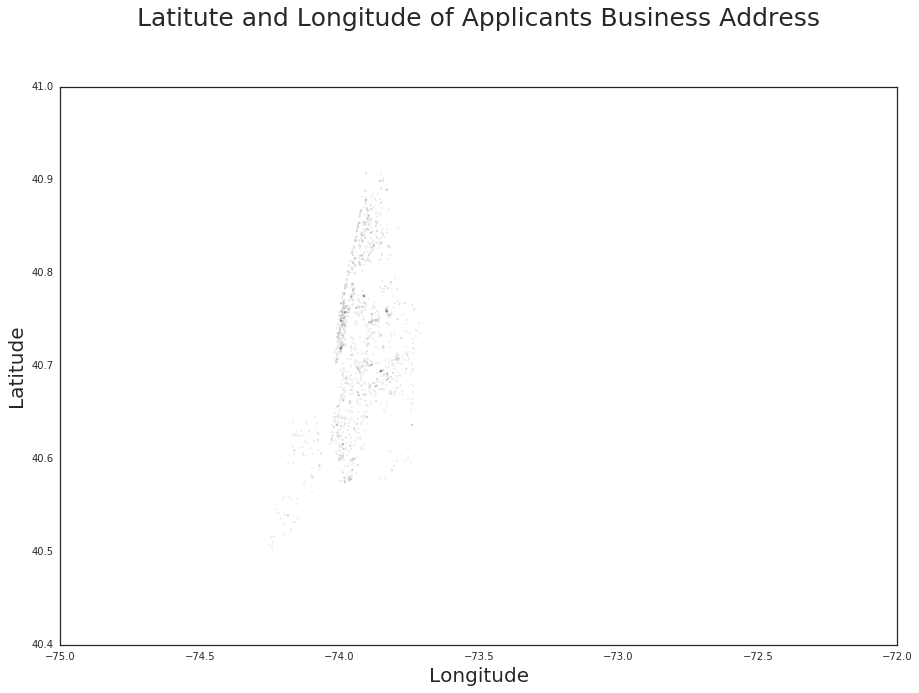

In [161]:
%matplotlib inline

#adjust settings
sns.set_style("white")
plt.pyplot.figure(figsize=(15,10))

#create scatterplots
plt.pyplot.scatter(dataFrame.Longitude, dataFrame.Latitude, alpha=0.05, s=4, color='black')

#adjust more settings
plt.pyplot.title('Latitute and Longitude of Applicants Business Address\n\n', size=25)
plt.pyplot.xlim((-75,-72))
plt.pyplot.ylim((40.4,41))
plt.pyplot.xlabel('Longitude',size=20)
plt.pyplot.ylabel('Latitude',size=20)

plt.pyplot.show()